# Sobre o notebook:

**Problema principal:**
1. Qual foi o gasto total com salários de funcionários pela empresa?
2. Qual foi o faturamento da empresa?
3. Qual o % de funcionários que já fechou algum contrato?
4. Calcule o total de contratos que cada área da empresa já fechou
5. Calcule o total de funcionários por área
6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

**Objetivos:**

- Estudar os dados referentes ao dataset (BaseServiçosPrestados.xlsx) de prestação de serviços que irão para as análises;
- Verificar a possibilidade de tratamento dos dados;

**O que se trata esse dataset?**

- Constam informações sobre a execução de serviços prestados, clientes e funcionário.

**Qual é o significado de cada coluna deste dataset?**

1. Codigo do Servico(int) = Sequência de índice por venda;
2. ID Funcionário(object -> date) = Data referente a venda do produto;
3. ID Cliente(object -> date) = Data referente ao envio do produto;
4. Tempo Total de Contrato (Meses)(int) = Idetificação unica do meio que ocasionou a venda;

**Quais tipos de problemas que vamos resolver?**

R - Preparar os dados para serem acessíveis a qualquer técnica estatística, realizar um exame gráfico da natureza das variáveis
individuais, uma análise descritiva que permita quantificar alguns aspectos gráficos dos dados e identificar a presença de dados ausentes (missing).

# Configurando o ambiente

Aqui temos todas as bibliotecas que utilizaremos neste notebook.

In [1]:
# importar todos os dataset

import pandas as pd
import seaborn as sns

# Carregando os dados

Pegaremos os dados diretamente do repositório no github assim eles podem ser atualizados e, com isso estaremos preparados para identificar novas análises os dados.

In [2]:
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',')
cliente_df = pd.read_csv('CadastroClientes.csv', sep = ';', decimal = ',')
servico_df = pd.read_excel('BaseServiçosPrestados.xlsx')

In [3]:
# visualizar todos os dataset

display(funcionarios_df)
display(cliente_df)
display(servico_df)

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


# Análise Exploratória dos Dados

Queremos ver como está a estatística básicas dos dados.

In [4]:
# Informações gerais existentes na base de dados

servico_df.info()
cliente_df.info()
funcionarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Codigo do Servico                237 non-null    object
 1   ID Funcionário                   237 non-null    int64 
 2   ID Cliente                       237 non-null    int64 
 3   Tempo Total de Contrato (Meses)  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Valor Contrato Mensal  320 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113

In [5]:
servico_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID Funcionário,237.0,69.776371,41.148715,1.0,36.0,68.0,103.0,150.0
ID Cliente,237.0,160.485232,94.354614,1.0,80.0,161.0,241.0,320.0
Tempo Total de Contrato (Meses),237.0,9.654008,2.985579,4.0,8.0,10.0,12.0,14.0


<AxesSubplot:>

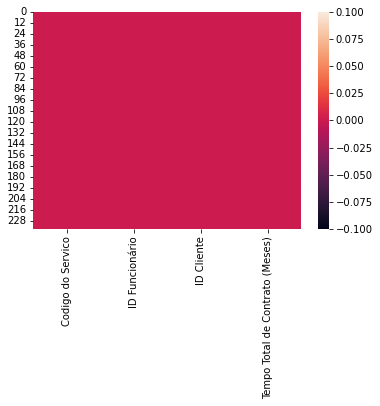

In [6]:
#Checando existência de colunas com dados NA

sns.heatmap(servico_df.isna())

Constata-se que a base está limpa e sem valores faltantes no dataset.

# Processo de tratamento dos dados

No processo de ETL os dados são transformados e ajustados conforme a necessidade, dessa forma, esses dados podem ser atribuídas diferentes regras que vão ajudar a melhorar a sua qualidade.

In [7]:
# Juntar os dataset

funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis = 1)
display(funcionarios_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


# 1. Folha Salarial

In [8]:
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('Total da Folha Salarial Mensal é de R$ {:,}'.format(funcionarios_df['Salario Total'].sum()))

Total da Folha Salarial Mensal é de R$ 2,717,493.22


# 2. Faturamento da Empresa

In [9]:
faturamentos_df = servico_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(cliente_df[['ID Cliente', 'Valor Contrato Mensal', 'Cliente']], on = 'ID Cliente')

display(faturamentos_df)

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Cliente
0,1,14,540,Teixeira Gonçalves
1,2,12,1260,Souza Santos
2,4,14,2520,Santos Costa
3,5,8,3510,Do Monteiro
4,6,8,2340,Soares Lobo
...,...,...,...,...
232,315,4,1575,Americo Bomfim
233,316,8,3690,Manoel Costa
234,317,6,2385,Gomes Machado
235,319,14,4185,Pereira Fazenda


In [10]:
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal'] 

display(faturamentos_df)
print('Faturamento Total é de R$ {:,}'.format(sum(faturamentos_df['Faturamento Total'])))

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Cliente,Faturamento Total
0,1,14,540,Teixeira Gonçalves,7560
1,2,12,1260,Souza Santos,15120
2,4,14,2520,Santos Costa,35280
3,5,8,3510,Do Monteiro,28080
4,6,8,2340,Soares Lobo,18720
...,...,...,...,...,...
232,315,4,1575,Americo Bomfim,6300
233,316,8,3690,Manoel Costa,29520
234,317,6,2385,Gomes Machado,14310
235,319,14,4185,Pereira Fazenda,58590


Faturamento Total é de R$ 5,519,160


# 3. Funcionários que já Fecharam Contrato

In [11]:
qtde_funcionario_fecharam_contrato = len(servico_df['ID Funcionário'].unique())
print(qtde_funcionario_fecharam_contrato)
qtde_funcionarios_total = len(funcionarios_df['ID Funcionário'])
print(qtde_funcionarios_total)

print('Percentual de Funcionários que fecharam contrato foi de {:.2%}'.format(qtde_funcionario_fecharam_contrato / qtde_funcionarios_total))

99
114
Percentual de Funcionários que fecharam contrato foi de 86.84%


# 4. Quantidade de Contratos por Área

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


<AxesSubplot:title={'center':'Quantidade de Contratos por Área'}, ylabel='Area'>

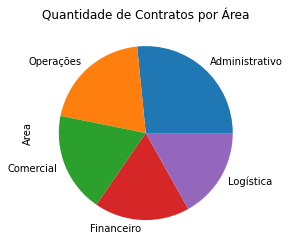

In [18]:
contratos_area_df = servico_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')
display(contratos_area_df)
contratos_area_qtde = contratos_area_df['Area'].value_counts()
print(contratos_area_qtde)

contratos_area_qtde.plot(kind = 'pie', title = 'Quantidade de Contratos por Área')

# 5. Quantidade de Funcionários por Área

<AxesSubplot:title={'center':'Quantidade de Funcioários por Área'}>

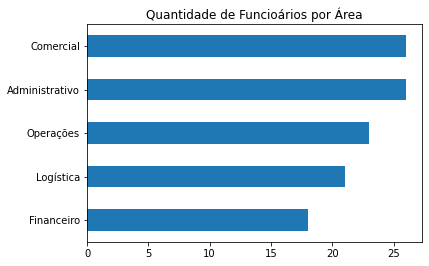

In [16]:
funcionario_area = funcionarios_df['Area'].value_counts().sort_values()


funcionario_area.plot(kind = 'barh', title = 'Quantidade de Funcioários por Área')

# 6. Ticket Médio Mensal

In [14]:
ticket_medio =  cliente_df['Valor Contrato Mensal'].mean()
print('O Ticket Médio Mensal foi de R$ {:,.2f}'.format(ticket_medio))

O Ticket Médio Mensal foi de R$ 2,502.56
